<img src = 'https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true' width="240" height="360">

# EDA on Breast Cancer Survival Data

<img src = "https://github.com/babukanagaraj/DataScience/raw/master/Exploratory-Data-Analysis/BreastCancerSurvival/images/october-pink.jpg"> </br>

It is important to understand and analyze the survival status of breast cancer patients as it has become more common among women and to some extent in men as well. Analysis will help understand the seriousness of the disease. Detailed information about breast cancer can be found at this [link](https://www.cancer.net/cancer-types/breast-cancer/introduction).

## Table of Contents

<a id=section1></a>
## 1. Problem Statement

_to be done_

<a id=section2></a>
## 2. Importing Packages

In [1]:
# Install pandas-profiling, please use this command. 

!pip install pandas-profiling --upgrade

  Stored in directory: C:\Users\Babu Kanagaraj\AppData\Local\pip\Cache\wheels\ce\c7\f1\dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Stored in directory: C:\Users\Babu Kanagaraj\AppData\Local\pip\Cache\wheels\43\07\ac\7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Stored in directory: C:\Users\Babu Kanagaraj\AppData\Local\pip\Cache\wheels\b0\b2\96\2074eee7dbf7b7df69d004c9b6ac4e32dad04fb7666cf943bd
Successfully built pandas-profiling htmlmin confuse


In [1]:
# Import necessary packages

import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

import pandas_profiling

<a id=section3></a>
## 3. Loading Data

In this Data Visualization sheet, we are using the dataset **Breast Cancer Survival** and this contains info and survival status of Breast Cancer patients who had undergone surgery between 1958 and 1970 at the University of Chicago's Billings Hospital.

<img src = "https://github.com/babukanagaraj/DataScience/raw/master/Exploratory-Data-Analysis/BreastCancerSurvival/images/pink-ribbon.jpg"> </br>

### Importing Dataset

In [2]:
# Importing the Breast cancer survival dataset 

df_pre_bcs = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/Breast_cancer_survival.csv')
df_pre_bcs.head()

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


<a id=section301></a>
### 3.1 Description of the Dataset

- This dataset provides details on the **survival status** of the breast cancer patients who had undergone surgery.

| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| Age                            | Age of patient at time of operation (numerical).                                           | 
| Years_of_operation             | Patient's year of operation (year - 1900; numerical).                                      | 
| Pos_axillary_nodes             | Number of positive axillary nodes detected (numerical).                                    | 
| Status                         | Survival status (Categorical).                                                             |
|                                | 1 - patient lived 5 years or longer post operation                                         |
|                                | 2 - patient died within 5 years post operation                                             |


In [18]:
df_pre_bcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                   306 non-null int64
Years_of_operation    306 non-null int64
Pos_axillary_nodes    306 non-null int64
Status                306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


- ```info``` function gives us the following insights into the df_pre_bcs dataframe:
    - There are total of **306** rows and **4** columns in the dataframe.
    - All columns are of **numeric** datatype.
    - There are **0 missing** values in the data.

In [6]:
df_pre_bcs.describe()

,Age,Years_of_operation,Pos_axillary_nodes,Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


- ```describe``` function gives us the following insights into the df_pre_bcs dataframe:
    - The **average/mean age** of the breast cancer patient who had undergone surgery is **52.457516**.
    - The **Age column** almost follows **normal distribution** since the **mean (52.457516)** is very close to **median (52)** and also the data is slightly **Right-skewed** since the **mean > median**. 
    - The **max** value of **Pos_axillary_nodes** is an **outlier** since the value is very far from the mean.

<a id=section302></a>
### 3.2 Pandas Profiling before Data Preprocessing

In [20]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html

profile = df_pre_bcs.profile_report(title="BCS Profiling before Data Preprocessing")
profile.to_file(output_file="bcs_profiling_before_preprocessing.html")

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 4
- Number of observations: 306
- Missing cells: 0
- Duplicate rows: 17 (5.6%)


__Variables types__: 
- Numeric = 3
- Categorical = 1

<br>

- Dataset has **17 (5.6%) duplicate rows**.


- **Pos_axillary_nodes** has **136 (44.4%) zeros**.



- **Age** has a **skewness** of **0.1465** and **kurtosis** of **-0.589**.
    - The distribution follows almost **normal distribution** since the **skewness** is **very near to 0** and also the distribution is slightly **positive/Right-skewed**.
    - **Low/Negative** value of kutosis implies that the data are **light-tailed or lack of outliers**.
    
    
- **Pos_axillary_nodes** has a **skewness** of **2.9838** and **kurtosis** of **11.730**.
    - **High skewness** value implies that the data is **highly Right-skewed**.
    - The high value of **kurtosis** implies that the tail is heavy and there is a presence of outliers in the data (**maximum value = 52 is an outlier**).
    
    
- **Years_of_operation** has a **skewness** of **0.0787** and **kurtosis** of **-1.118**.
    - The distribution is fairly **symmetrical** since the **skewness** is **very near to 0**.
    - **Low/Negative** value of kutosis implies that the data are **light-tailed or lack of outliers**.

<a id=section4></a>
## 4. Data Preprocessing

<a id=section401></a>
### 4.1 Data Preprocessing

- Since the dataset has **17 duplicate rows** , we will drop those duplicates.

In [3]:
df_post_bcs = df_pre_bcs.drop_duplicates()
df_post_bcs

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


- Since the duplicate rows had been removed, we may need to **reset the index** and possibly **drop** them so that index will not be present in post pandas-profiling.

In [4]:
df_post_bcs.reset_index(drop=True,inplace=True)
df_post_bcs

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


<a id=section402></a>
### 4.2 Pandas Profiling after Data Preprocessing

In [29]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_after_preprocessing.html

profile = df_post_bcs.profile_report(title="BCS Profiling After Data Preprocessing")
profile.to_file(output_file="bcs_profiling_after_preprocessing.html")

**Observations from Pandas Profiling after Data Processing** <br><br>
__Dataset info__:
- Number of variables: 4
- Number of observations: 289
- Missing cells: 0
- Duplicate rows: 0


__Variables types__: 
- Numeric = 3
- Categorical = 1

<br>

- **Pos_axillary_nodes** has **121 (41.9%) zeros**.



- **Age** has a **skewness** of **0.1653** and **kurtosis** of **-0.570**.
    - The distribution follows almost **normal distribution** since the **skewness** is **very near to 0** and also the distribution is slightly **positive/Right-skewed**.
    - **Low/Negative** value of kutosis implies that the data are **light-tailed or lack of outliers**.
    
    
- **Pos_axillary_nodes** has a **skewness** of **2.914** and **kurtosis** of **11.164**.
    - **High skewness** value implies that the data is **highly Right-skewed**.
    - The high value of **kurtosis** implies that the tail is heavy and there is a presence of outliers in the data (**maximum value = 52 is an outlier**).
    
    
- **Years_of_operation** has a **skewness** of **0.064** and **kurtosis** of **-1.135**.
    - The distribution is fairly **symmetrical** since the **skewness** is **very near to 0**.
    - **Low/Negative** value of kutosis implies that the data are **light-tailed or lack of outliers**.
    

- **Removal of Duplicate rows** has slightly changed the **skewness and kurtosis values** but there is no change to the observation with respect to distribution of data.

<a id=section5></a>
## 5. Exploratory Data Analysis

<a id=section501></a>
## 5.1 Analysis Based on Age

<a id=section50101></a>
### 5.1.1 How many Breast Cancer patients belong to the same age?

In [18]:
df_post_bcs['Age'].value_counts(sort=False)

30    3 
31    2 
33    2 
34    7 
35    2 
36    2 
37    5 
38    9 
39    6 
40    3 
41    9 
42    9 
43    10
44    6 
45    9 
46    7 
47    11
48    6 
49    10
50    11
51    6 
52    14
53    11
54    12
55    9 
56    6 
57    10
58    7 
59    8 
60    6 
61    7 
62    6 
63    7 
64    5 
65    9 
66    5 
67    5 
68    2 
69    4 
70    7 
71    1 
72    4 
73    2 
74    2 
75    1 
76    1 
77    1 
78    1 
83    1 
Name: Age, dtype: int64

Text(0.5, 1.0, 'Number of Breast Cancer patients with the same age')

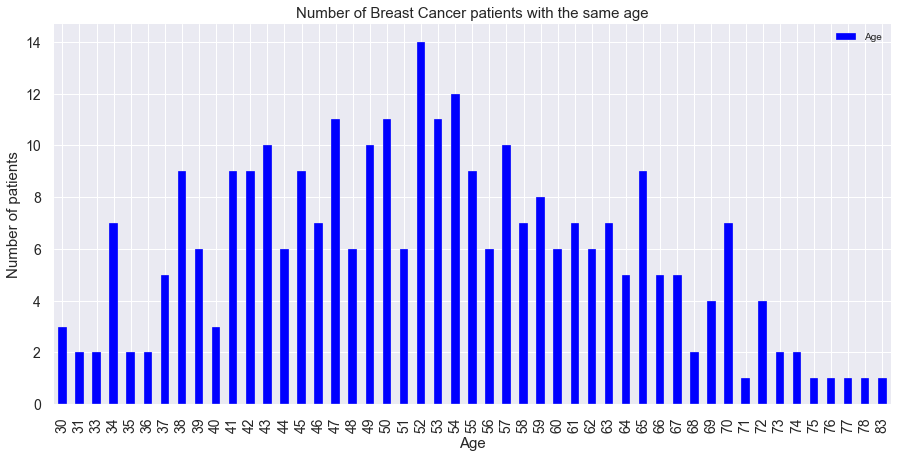

In [26]:
# Bar chart
df_post_bcs['Age'].value_counts(sort=False).plot(kind='bar', figsize=(15,7), color='blue', fontsize=14, legend=True)

plt.xlabel('Age', fontsize=15)
plt.ylabel('Number of patients', fontsize=15)
plt.title('Number of Breast Cancer patients with the same age',fontsize=15)

- Number of people diagnosed with Breast Cancer,
    - Are more around mean age (~52).
    - Are less in the initial data distribution.
    - \> 6 are widely distributed across entire distribution.
    - = 1 are distributed towards the end/right tail as there are less chances that the people may live upto that age.

<a id=section50102></a>
### 5.1.2 How many Breast Cancer patients belong to the same age group?

Text(0.5, 1.0, 'Number of Breast Cancer patients within the same age group')

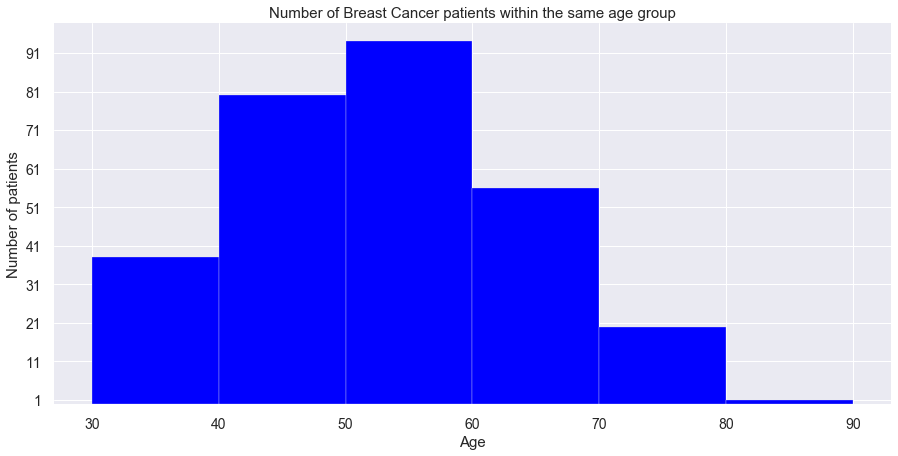

In [35]:
# Histogram
bins = [30,40,50,60,70,80,90]
df_post_bcs['Age'].plot(kind='hist', bins=bins, figsize=(15,7), color='blue', fontsize=14, 
                        xticks=bins, yticks=np.arange(1,101,10))

plt.xlabel('Age', fontsize=15)
plt.ylabel('Number of patients', fontsize=15)
plt.title('Number of Breast Cancer patients within the same age group',fontsize=15)

- Number of people diagnosed with Breast Cancer,
    - Are more in the age group 50-60.
    - Are very less in the age group 80-90.
    

- The data distribution shows positive correlation between the age groups 30-60.


- The data distribution shows negative correlation between the age-groups 60-90. This shows as the age increases either the people are less diagnosed with cancer or the population of that age group is relatively less than the other age groups. 

<a id=section502></a>
## 5.2 Analysis Based on Year of operation

<a id=section50201></a>
### 5.2.1 How many Breast Cancer patients undergone surgery during a year?

In [37]:
df_post_bcs['Years_of_operation'].value_counts(sort=False)

58    34
59    25
60    26
61    24
62    22
63    28
64    28
65    27
66    26
67    25
68    13
69    11
Name: Years_of_operation, dtype: int64

Text(0.5, 1.0, 'Number of Breast Cancer patients undergone surgery in a year')

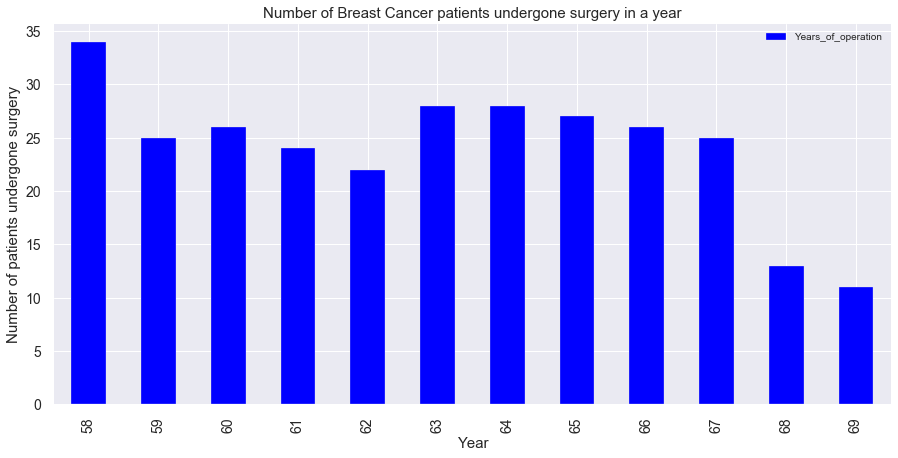

In [39]:
# Bar chart
df_post_bcs['Years_of_operation'].value_counts(sort=False).plot(kind='bar', figsize=(15,7), color='blue', fontsize=14, legend=True)

plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of patients undergone surgery', fontsize=15)
plt.title('Number of Breast Cancer patients undergone surgery in a year',fontsize=15)

- Number of patients undergone surgery are high during the year 1958.

- Number of patients undergone surgery are less during the year 1969. 

- Patients undergone surgery between 1959 - 1968 are moderate in number. 

- Number of patients undergone surgery during 1969 are 68% less than that of surgeries undergone during 1958.
    - This negative trend shows that the severity of the breast cancer requiring surgery had reduced over a period of time, or
    - People would have started following healthy lifestyle thus reducing the count in the number of breast cancer patients.

<a id=section503></a>
## 5.3 Analysis Based on number of Positive axillary nodes

<a id=section50301></a>
### 5.3.1 How many Postive axillary nodes are associated with Breast Cancer patients?

In [41]:
df_post_bcs['Pos_axillary_nodes'].value_counts(sort=False)

0     121
1     40 
2     20 
3     20 
4     13 
5     6  
6     7  
7     7  
8     7  
9     6  
10    3  
11    3  
12    2  
13    5  
14    4  
15    3  
16    1  
17    1  
18    1  
19    3  
20    2  
21    1  
22    3  
23    3  
24    1  
25    1  
28    1  
30    1  
35    1  
46    1  
52    1  
Name: Pos_axillary_nodes, dtype: int64

Text(0.5, 1.0, 'Number of Positive Axillary nodes associated with Breast Cancer patients')

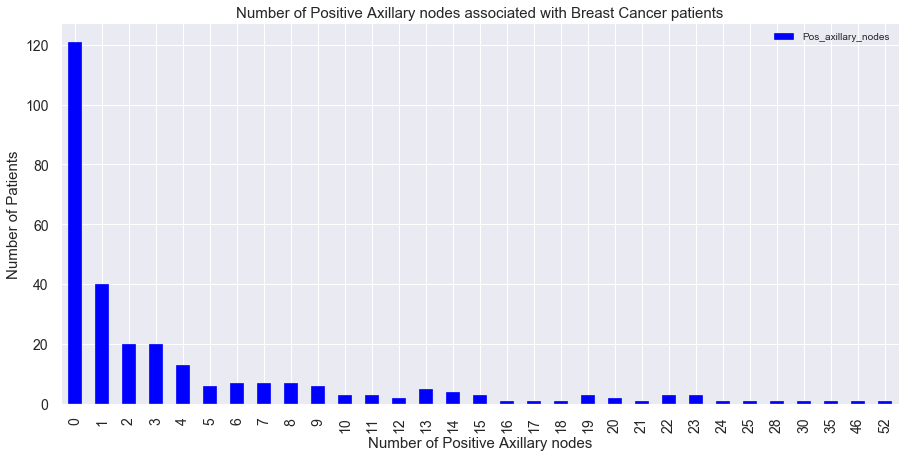

In [42]:
# Bar chart
df_post_bcs['Pos_axillary_nodes'].value_counts(sort=False).plot(kind='bar', figsize=(15,7), color='blue', fontsize=14, legend=True)

plt.xlabel('Number of Positive Axillary nodes', fontsize=15)
plt.ylabel('Number of Patients', fontsize=15)
plt.title('Number of Positive Axillary nodes associated with Breast Cancer patients',fontsize=15)

- There are high number of patients with 0 positive axillary nodes. This shows that many patients were diagnosed with Breast cancer at an early stage.

<a id=section504></a>
## 5.4 Analysis Based on Survival status

<a id=section50401></a>
### 5.4.1 How many Breast Cancer patients survived more than 5 years and less than 5 years post surgery?

In [45]:
df_post_bcs['Status'].value_counts(sort=False)

1    210
2    79 
Name: Status, dtype: int64

Text(0.5, 1.0, 'Pie chart showing the proportion of Survival status')

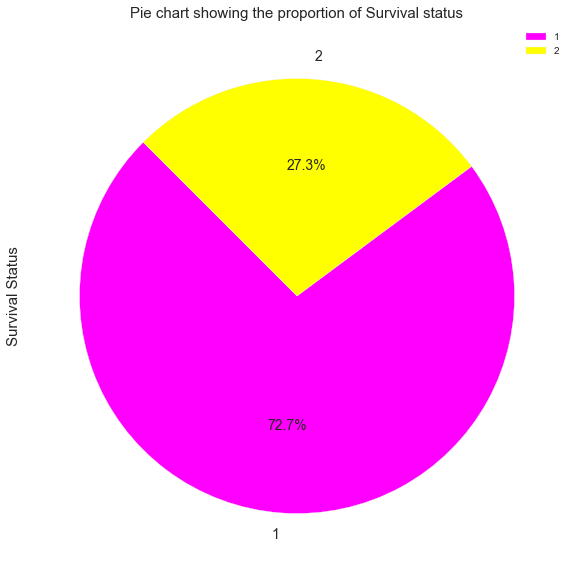

In [63]:
#Pie chart
df_post_bcs['Status'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), startangle=135, legend=True, cmap='spring')

plt.ylabel('Survival Status', fontsize=15)
plt.title('Pie chart showing the proportion of Survival status', fontsize=15)

- The data distribution implies,
    - 72.7% of breast cancer patients survived 5 years or longer,
    - 27.3% of breast cancer patients survived less than 5 years post surgery.